<a href="https://colab.research.google.com/github/kurihara-ryo/cesarean-pasaran/blob/main/%E3%80%90%E8%A7%A3%E7%AD%94%E4%BE%8B%E3%80%91%E3%83%AC%E3%83%9B%E3%82%9A%E3%83%BC%E3%83%88%E8%AA%B2%E9%A1%8C_%E3%83%95%E3%82%9A%E3%83%AD%E3%82%AF%E3%82%99%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%AF%E3%82%99%E2%85%A2_1112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

各課題について、コメントを参考にしてプログラムを書いてください。実行ボタンを押して、プログラムが正しく実行されることを確認してください。提出の際は、コメントを削除せずに残してください。全ての課題を解けなかった場合でも、〆切までに提出すれば途中点が付与されます。**レポート課題は配点が大きいので、必ず期限内に提出してください。未提出の場合、<font color='red'>単位を落とす可能性が非常に高くなります</font>。**

# 課題1

2クラス分類のためのニューラルネットワークをPythonで1から書いてみましょう。交差エントロピー誤差を損失関数として、確率的勾配降下法を用いて学習を行ってください。学習したモデルの予測精度を評価してください。以下の手順に沿って進めてください。

手順1

csvファイルから学習データをデータフレームとして読み込み、内容を確認してください。また、データフレームを入力と予測対象に分けて、それぞれをnumpyアレイに格納してください。

In [ ]:
# モジュールの準備
# numpy, pandas, gdownをimportする。
import numpy as np
import pandas as pd
import gdown

# 学習データのcsvファイルをダウンロード
url='https://drive.google.com/uc?export=download&id=17RctbyvrxeSI2gnriFf3tGuWWvPxzol8'
gdown.download(url, 'kadai1_data_train.csv', quiet=False)

# csvファイルをデータフレームとして読み込む
df = pd.read_csv('kadai1_data_train.csv')

# データフレームを画面に表示
# 各行が1個の学習データを表している。
# 入力xは2次元ベクトルx1, x2として記載されている。
# 各xについて予測対象yの真の値が記載されている。
# 2クラス分類なのでyは0, 1どちらか。
# 学習データ数は50個。
display(df)

# データフレームをXとy_trueに分ける
# Xは50個の2次元ベクトルが並んだ50行2列のデータフレーム。
# y_trueは50個の値が並んだ50行1列のデータフレーム。
X = df.iloc[:, :-1]
y_true = df.iloc[:, -1]

# 今後の計算を行いやすくするため、X, y_trueをnumpyアレイに変換しておく。
# to_numpy()を使うとデータフレームをnumpyアレイに変換できる。
X = X.to_numpy()
y_true = y_true.to_numpy()

# Xとy_trueをprint()で確認
# Xは50行2列の行列、y_trueは長さ50のベクトルになっているはず。
print('X:\n{}\n'.format(X))
print('y_true:\n{}'.format(y_true))

# 注意:
# 今回のデータセットは課題用に適切な前処理を行ってあるため、
# 自分でStandardScalerなどの前処理を行う必要はありません。

Downloading...
From: https://drive.google.com/uc?export=download&id=17RctbyvrxeSI2gnriFf3tGuWWvPxzol8
To: /content/kadai1_data_train.csv
100%|██████████| 2.09k/2.09k [00:00<00:00, 4.15MB/s]


,x1,x2,y
0,0.867181,1.019686,0
1,0.147789,0.948173,1
2,0.960789,0.853649,0
3,-0.054438,0.011092,0
4,1.091540,1.032875,0
5,-0.046342,0.953427,1
6,0.082254,0.877916,1
7,0.858463,-0.042065,1
8,1.157921,1.076743,0
9,0.081253,0.135624,0


X:
[[ 8.67181395e-01  1.01968612e+00]
 [ 1.47789404e-01  9.48172978e-01]
 [ 9.60789185e-01  8.53648505e-01]
 [-5.44382725e-02  1.10922590e-02]
 [ 1.09154021e+00  1.03287511e+00]
 [-4.63417693e-02  9.53427025e-01]
 [ 8.22544912e-02  8.77915635e-01]
 [ 8.58462926e-01 -4.20645323e-02]
 [ 1.15792128e+00  1.07674347e+00]
 [ 8.12525822e-02  1.35624003e-01]
 [-1.15099358e-01  1.03756980e+00]
 [-1.01283112e-01  3.14247333e-02]
 [ 9.32307800e-01  6.11676289e-02]
 [ 1.02419623e+00 -1.91328024e-01]
 [ 1.03616360e+00 -6.45119755e-02]
 [-4.69474386e-02  5.42560044e-02]
 [-2.61974510e-01  1.08219025e+00]
 [ 3.43618290e-02 -1.76304016e-01]
 [-5.29760204e-02  5.13267433e-02]
 [-7.20101216e-03  1.10035329e+00]
 [ 5.11345664e-04  9.76541287e-01]
 [ 9.39829339e-01  1.18522782e+00]
 [-9.08024076e-02  8.58769630e-01]
 [-1.34972247e-03 -1.05771093e-01]
 [ 9.52082576e-01 -1.85658977e-02]
 [-3.58260391e-03  1.56464366e-01]
 [ 3.24083969e-02  9.61491772e-01]
 [ 1.00675282e+00  8.57525181e-01]
 [ 4.96714153e-02

手順2

以下のセルを読み、本課題におけるニューラルネットワークの表現方法について確認してください。また、活性化関数、出力関数、順方向計算の関数、損失関数を書いてください。

In [ ]:
# 本課題では、ニューラルネットワーク内の変数を辞書varsを用いて表現する。
# 辞書のキーは各変数がどの層の変数なのかを文字列で表し、
# 辞書の値は各変数の現在の値をリストやスカラーとして格納する。
# 変数の値は学習の過程で変化していく。
# 今は適当に0.0を入れてある。
vars = {
    'x': [0.0, 0.0], # 入力層の変数のリスト(x1, x2)
    'u1': [0.0, 0.0], # 1層目の変数のリスト(活性化関数に入れる前)
    'z1': [0.0, 0.0], # 1層目の変数のリスト(活性化関数の計算結果)
    'u2': [0.0, 0.0], # 2層目の変数のリスト(活性化関数に入れる前)
    'z2': [0.0, 0.0], # 2層目の変数のリスト(活性化関数の計算結果)
    'u3': 0.0, # 出力層の変数(出力関数に入れる前)
    'y_pred': 0.0 # 出力関数の計算結果、つまりyの予測値
}

# ニューラルネットワークのパラメータを辞書paramsを用いて表現する。
# 辞書のキーは各パラメータがどの層のパラメータなのかを文字列として表し、
# 辞書の値は各パラメータの現在の値をリストやスカラーとして格納する。
# 例えば、W1はユニットiからユニットjへの重みをW1[j][i]で表す。
# b1はユニットjへのバイアスをb1[j]で表す。
# W2, b2も同様。
# W3, b3は出力層のユニット数が1なので次元が減る。
# パラメータの値は学習の過程で変化していく。
# 今は適当に0.0を入れてある。
params = {
    'W1': [[0.0, 0.0], [0.0, 0.0]], # 入力層から1層目への重みパラメータ
    'b1': [0.0, 0.0], # 入力層から1層目へのバイアスパラメータ
    'W2': [[0.0, 0.0], [0.0, 0.0]], # 1層目から2層目への重みパラメータ
    'b2': [0.0, 0.0], # 1層目から2層目へのバイアスパラメータ
    'W3': [0.0, 0.0], # 2層目から出力層への重みパラメータ
    'b3': 0.0 # 2層目から出力層へのバイアスパラメータ
}


# 活性化関数および出力関数にはシグモイド関数を用いる。
# 引数はスカラー、戻り値はスカラー。
def sigmoid(u):
    return 1 / (1 + np.exp(-u))


# 順方向計算の関数
# 入力変数のリストxとパラメータの辞書paramsを引数として受け取り、
# 変数の辞書varsを戻り値として返す。
def forward_prop(x, params):
    # 入力層から1層目への計算
    u1 = [0.0, 0.0] # 初期化
    z1 = [0.0, 0.0] # 初期化
    for j in range(2):
        u1[j] = x[0] * params['W1'][j][0] + x[1] * params['W1'][j][1] + params['b1'][j]
        z1[j] = sigmoid(u1[j])

    # 1層目から2層目への計算
    u2 = [0.0, 0.0]
    z2 = [0.0, 0.0]
    for j in range(2):
        u2[j] = z1[0] * params['W2'][j][0] + z1[1] * params['W2'][j][1] + params['b2'][j]
        z2[j] = sigmoid(u2[j])

    # 2層目から出力層への計算
    u3 = z2[0] * params['W3'][0] + z2[1] * params['W3'][1] + params['b3']
    y_pred = sigmoid(u3)

    vars = {'x': x, 'u1': u1, 'z1': z1, 'u2': u2, 'z2': z2, 'u3': u3, 'y_pred': y_pred}
    return vars


# 損失関数
# 2クラス分類なので交差エントロピー誤差を用いる。
# 引数y_true, y_predはベクトル、戻り値はスカラー。
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# デバッグ用
# 入力x = [0.0, 0.0]に対して順方向計算を行う。
# エラーが出なくなるまで修正しよう。
print('Example calculation for x = [0.0, 0.0]')
vars = forward_prop([0.0, 0.0], params)
# 変数の値の確認。
# inf, nanなど異常値になっていないか確認しよう。
print('Variables: {}'.format(vars))
# u3, y_predの値を取得。
# 今はパラメータを全て0.0に設定しているので、u3は0.0、y_predはsigmoid(0.0)=0.5になるはず。
# 正しい答えが出るまで修正しよう。
print('u3: {}'.format(vars['u3']))
print('y_pred: {}'.format(vars['y_pred']))

Example calculation for x = [0.0, 0.0]
Variables: {'x': [0.0, 0.0], 'u1': [0.0, 0.0], 'z1': [np.float64(0.5), np.float64(0.5)], 'u2': [np.float64(0.0), np.float64(0.0)], 'z2': [np.float64(0.5), np.float64(0.5)], 'u3': np.float64(0.0), 'y_pred': np.float64(0.5)}
u3: 0.0
y_pred: 0.5


手順3

以下のセルを読み、本課題における勾配の表現方法について確認してください。また、活性化関数の導関数、誤差逆伝播の関数、パラメータ更新の関数を書いてください。

In [ ]:
# 損失関数の勾配を辞書gradsを用いて表現する。
# パラメータの辞書paramsと同じ形式を用いて、
# 各パラメータに関する損失関数の微分の値を格納する。
# 微分の値は学習の過程で変化していく。
# 今は適当に0.0を入れてある。
grads = {
    'dW1': [[0.0, 0.0], [0.0, 0.0]], # パラメータW1に関する微分
    'db1': [0.0, 0.0], # パラメータb1に関する微分
    'dW2': [[0.0, 0.0], [0.0, 0.0]], # パラメータW2に関する微分
    'db2': [0.0, 0.0], # # パラメータb2に関する微分
    'dW3': [0.0, 0.0], # パラメータW3に関する微分
    'db3': 0.0 # パラメータb3に関する微分
}


# シグモイド関数の導関数
# 誤差逆伝播に用いる。
# 引数はスカラー、戻り値はスカラー。
def sigmoid_deriv(u):
    s = sigmoid(u)
    return s * (1 - s)


# 誤差逆伝播の関数
# y_true、パラメータの辞書params、変数の辞書varsを引数として受け取り、
# 勾配の辞書gradsを戻り値として返す。
# y_trueは確率的勾配降下法の各ステップで選んだ1つの学習データにおける真のyの値。
# ベクトルではなくスカラーなので注意。
# 対応するyの予測値y_predはvarsに入っている。
def backward_prop(y_true, params, vars):
    x = vars['x']
    u1, z1 = vars['u1'], vars['z1']
    u2, z2 = vars['u2'], vars['z2']
    u3, y_pred = vars['u3'], vars['y_pred']

    # 出力層
    dW3 = [0.0, 0.0] # 初期化
    delta3 = y_pred - y_true # 出力層のデルタ、ニューラルネット用語の「誤差」
    for j in range(2):
        dW3[j] = delta3 * z2[j]
    db3 = delta3

    # 2層目
    dW2 = [[0.0, 0.0], [0.0, 0.0]] # 初期化
    delta2 = [0.0, 0.0] # 初期化
    for j in range(2):
        delta2[j] = delta3 * params['W3'][j] * sigmoid_deriv(u2[j])
    for j in range(2):
        for i in range(2):
            dW2[j][i] = delta2[j] * z1[i]
    db2 = delta2

    # 1層目
    dW1 = [[0.0, 0.0], [0.0, 0.0]] # 初期化
    delta1 = [0.0, 0.0] # 初期化
    for j in range(2):
        for k in range(2):
            delta1[j] += delta2[k] * params['W2'][k][j] * sigmoid_deriv(u1[j])
    for j in range(2):
        for i in range(2):
            dW1[j][i] = delta1[j] * x[i]
    db1 = delta1

    grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2, 'W3': dW3, 'b3': db3}
    return grads


# パラメータ更新の関数
# パラメータの辞書params、勾配の辞書grads、学習率lrを引数として受け取り、
# 更新した辞書paramsを戻り値として返す。
def update_params(params, grads, lr):
    for j in range(2):
        for i in range(2):
            params['W1'][j][i] -= lr * grads['W1'][j][i]
            params['W2'][j][i] -= lr * grads['W2'][j][i]
        params['b1'][j] -= lr * grads['b1'][j]
        params['b2'][j] -= lr * grads['b2'][j]
    for j in range(2):
        params['W3'][j] -= lr * grads['W3'][j]
    params['b3'] -= lr * grads['b3']

    return params


# デバッグ用
# まず入力x = [0.0, 0.0]に対して順方向計算を行い、
print('Example calculation for x = [0.0, 0.0]')
vars = forward_prop([0.0, 0.0], params)
# y_true = 0として誤差逆伝播を行う。
# エラーが出なくなるまで修正しよう。
print('Back prop when y_true = 0')
grads = backward_prop(0, params, vars)
# 勾配の値の確認。
# inf, nanなど異常値になっていないか確認しよう。
print('Gradients: {}'.format(grads))

Example calculation for x = [0.0, 0.0]
Back prop when y_true = 0
Gradients: {'W1': [[np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)]], 'b1': [np.float64(0.0), np.float64(0.0)], 'W2': [[np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)]], 'b2': [np.float64(0.0), np.float64(0.0)], 'W3': [np.float64(0.25), np.float64(0.25)], 'b3': np.float64(0.5)}


手順4

パラメータを初期化し、学習を行う前の損失関数の値と、学習データに対するROC AUCを計算してください。

In [ ]:
from sklearn.metrics import roc_auc_score

# パラメータの初期値
# 通常、重みパラメータは乱数で初期化し、バイアスパラメータは0.0で初期化する。
# 今回は採点の都合上、以下の固定値を用いる。(これも乱数で生成)
params_init = {
    'W1': [[-0.051964249505532176, -0.11119605035442469], [1.0417967990841295, -1.256739294064987]],
    'b1': [0.0, 0.0],
    'W2': [[0.7453876814972659, -1.7110537607276717], [-0.20586438172426652, -0.234571291207228]],
    'b2': [0.0, 0.0],
    'W3': [1.1281440438104338, -0.012625951627825618],
    'b3': 0.0
}

# パラメータの初期化
params = params_init

# 初期パラメータでのyの予測値
y_pred = np.zeros(y_true.shape[0])
for i in range(y_true.shape[0]):
    vars = forward_prop(X[i, :], params)
    y_pred[i] = vars['y_pred']

# 初期パラメータでの損失関数の値
loss_init = cross_entropy_loss(y_true, y_pred)

# 初期パラメータでのROC AUCの値
auc_init = roc_auc_score(y_true=y_true, y_score=y_pred)

print('Loss before training: {}'.format(loss_init))
print('ROC AUC before training: {}'.format(auc_init))

Loss before training: 0.716568265403481
ROC AUC before training: 0.52


手順5

確率的勾配降下法による学習を行い、損失関数の値の変化を記録してください。

In [ ]:
# エポック数
# 今回は1000に設定。
n_epoch = 1000

# 学習率
# 今回は0.1に設定。
learning_rate = 0.1

# このリストに各エポック終了時の損失関数の値を記録していく
loss_list = [loss_init] # まずは初期値を入れる

# 確率的勾配降下法
params = params_init
for ep in range(n_epoch):
    # バッチサイズ1なので普通にforを回せばいい
    for i in range(y_true.shape[0]):
        # i番目の学習データに対する順方向計算
        vars = forward_prop(X[i, :], params)
        # 誤差逆伝播
        grads = backward_prop(y_true[i], params, vars)
        # パラメータ更新
        params = update_params(params, grads, learning_rate)
    # エポック終了、損失関数を計算
    for i in range(y_true.shape[0]):
        vars = forward_prop(X[i, :], params)
        y_pred[i] = vars['y_pred']
    # 損失関数の値を記録
    loss_list.append(cross_entropy_loss(y_true, y_pred))


# 学習後の損失関数の値
print('Loss after training: {}'.format(loss_list[-1]))

# 学習後のROC AUC
print('ROC AUC after training: {}'.format(roc_auc_score(y_true=y_true, y_score=y_pred)))

# デバッグ用
# 変数、パラメータ、勾配の値はinf, nanなどの異常値になっていないか。
# 次元数はあっているか。
# 例えば、スカラーが入るべきところにリストが入っていたりしないか。
print('Variables:\n{}'.format(vars))
print('Parameters:\n{}'.format(params))
print('Gradients:\n{}'.format(grads))

Loss after training: 0.002173218831617057
ROC AUC after training: 1.0
Variables:
{'x': array([ 0.93993613, -0.02916937]), 'u1': [np.float64(-2.477762987125855), np.float64(8.001115928330243)], 'z1': [np.float64(0.07743185476747894), np.float64(0.9996650237622301)], 'u2': [np.float64(-7.90219231959701), np.float64(3.213095647016618)], 'z2': [np.float64(0.0003697948436111863), np.float64(0.9613241263635219)], 'u3': np.float64(6.188110822013353), 'y_pred': np.float64(0.9979505061503959)}
Parameters:
{'W1': [[np.float64(-4.839224870291986), np.float64(5.141003992400416)], [np.float64(5.909169738309202), np.float64(-5.449803639474477)]], 'b1': [np.float64(2.220759187759211), np.float64(2.2879064211100952)], 'W2': [[np.float64(2.5232506207874335), np.float64(-9.718108104848264)], [np.float64(-9.04891715663033), np.float64(2.5978622994041656)]], 'b2': [np.float64(1.6172804743492877), np.float64(1.3167780088268994)], 'W3': [np.float64(12.93121072807938), np.float64(13.00003869211803)], 'b3': n

手順6

手順5で計算した損失関数の値から学習曲線を描いてください。

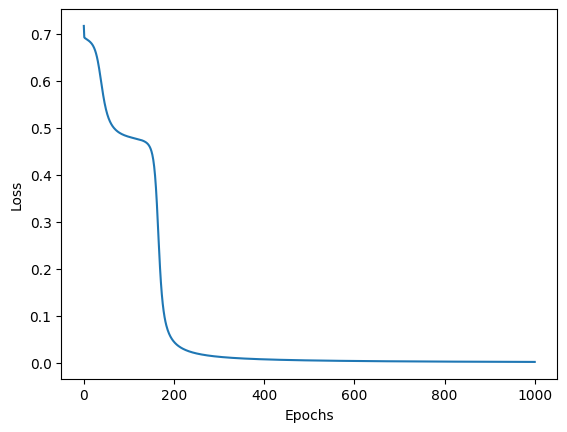

In [ ]:
import matplotlib.pyplot as plt

# 学習曲線
# x軸：確率的勾配降下法のエポック
# y軸：そのエポックにおける損失関数の値
plt.plot(range(len(loss_list)), loss_list)
plt.xlim=(0, len(loss_list))
plt.ylim=(0, max(loss_list))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

手順7

学習後のモデルを用いて、テストデータに対するROC AUCを評価してください。

In [ ]:
# テストデータのcsvファイルをダウンロード
url='https://drive.google.com/uc?export=download&id=1VSS6Juhj6NJrDhW7aOic8oz8v4yAGP0v'
gdown.download(url, 'kadai1_data_test.csv', quiet=False)
print('\n')

# csvファイルをデータフレームとして読み込む
df_test = pd.read_csv('kadai1_data_test.csv')

# データフレームをX_testとy_test_trueに分けて、numpyアレイに変換
X_test = df_test.iloc[:, :-1]
y_test_true = df_test.iloc[:, -1]
X_test = X_test.to_numpy()
y_test_true = y_test_true.to_numpy()

# 学習後のモデルを用いてテストデータの予測値を計算
y_test_pred = np.zeros(y_test_true.shape[0])
for i in range(y_test_true.shape[0]):
    vars = forward_prop(X_test[i, :], params)
    y_test_pred[i] = vars['y_pred']

# テストデータに対するROC AUC
auc_test = roc_auc_score(y_true=y_test_true, y_score=y_test_pred)
print('ROC AUC on test data: {}'.format(auc_test))

# デバッグ用
# y_predはinf, nanなどの異常値になっていないか。
# y_predが全てのデータに対して同じ値になっているなどの場合も異常なので、
# バグがないか振り返って確認しよう。
print('y_test_true:\n{}'.format(y_test_true))
print('y_test_pred:\n{}'.format(y_test_pred))

Downloading...
From: https://drive.google.com/uc?export=download&id=1VSS6Juhj6NJrDhW7aOic8oz8v4yAGP0v
To: /content/kadai1_data_test.csv
100%|██████████| 834/834 [00:00<00:00, 2.15MB/s]



ROC AUC on test data: 1.0
y_test_true:
[1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1]
y_test_pred:
[0.99817242 0.99826675 0.00335799 0.997999   0.00226909 0.00220815
 0.00223541 0.00231925 0.00309442 0.00327559 0.00241709 0.9981112
 0.00245398 0.9977289  0.00245861 0.99774066 0.99829649 0.99778581
 0.99572062 0.99724752]


手順8

以上の結果を考察してください。学習前と比較して学習後の損失関数の値は低下しているでしょうか。学習は収束していると言えるでしょうか。学習データに対する予測はうまくいっているでしょうか。テストデータに対する予測はうまくいっているでしょうか。

In [ ]:
#【解答欄】
# ここに考察を書いてください。
# 学習前と学習後を比較して、損失関数の値は0.717から0.002に低下した。
# 学習曲線を見ると、エポック400あたりから損失関数の値がほとんど変化しなくなっている。
# このことから学習は収束していると言える。
# 学習データに対する予測ではROC AUCが1.0となっており、うまくフィッティングできていると考えられる。
# テストデータに対する予測でもROC AUCが1.0となっているため、概ねうまく予測できていると考えられる。

# 課題2

自動微分をPythonで1から書いてみましょう。primitive演算として足し算、掛け算、累乗を考えます。自動微分を用いることにより、様々な関数の微分を簡単に計算できることを確認しましょう。以下の手順に沿って進めてください。

手順1

まず、練習のために、計算グラフのノードを表すクラス`ValueNodePractice1`を書いてください。ノード同士のprimitive演算を演算子のオーバーロードによって定義し、計算結果のノードが自動的に作られるようにしてください。

※演算子のオーバーロードについては、「プログラミングⅡ」第19,20回を適宜復習してください。

In [ ]:
# 計算グラフのノードを表すクラス
class ValueNodePractice1:
    # コンストラクタ
    def __init__(self, data):
        self.data = data # ノードがもつ変数の値
        self.prev = [] # このノードを計算する際に使用したノードのリスト

    # primitive演算: 足し算
    # self + other
    def __add__(self, other):
        # otherが計算グラフのノードならそのまま用いる
        if isinstance(other, ValueNodePractice1):
            other = other
        # ただのスカラーならノード化してから用いる
        else:
            other = ValueNodePractice1(other)
        # 計算結果のノードoutを新しく作る
        out = ValueNodePractice1(self.data + other.data)
        # outを計算する際にself, otherを使用したので記録しておく
        out.prev = [self, other]
        # 計算結果としてノードoutを返す
        return out

    # primitive演算: 掛け算
    # self * other
    def __mul__(self, other):
        # otherが計算グラフのノードならそのまま用いる
        if isinstance(other, ValueNodePractice1):
            other = other
        # ただのスカラーならノード化してから用いる
        else:
            other = ValueNodePractice1(other)
        # 計算結果のノードoutを新しく作る
        out = ValueNodePractice1(self.data * other.data)
        # outを計算する際にself, otherを使用したので記録しておく
        out.prev = [self, other]
        # 計算結果としてノードoutを返す
        return out

    # primitive演算: 掛け算
    # other * self
    # self * otherと同じ処理を行う
    def __rmul__(self, other):
        return self * other

    # primitive演算: 累乗
    # self ** power
    # 今回は簡単のためpowerはノード化しない
    def __pow__(self, power):
        # 計算結果のノードoutを新しく作る
        out = ValueNodePractice1(self.data ** power)
        # outを計算する際にselfを使用したので記録しておく
        out.prev = [self]
        # 計算結果としてノードoutを返す
        return out

    # 計算グラフの確認用
    # ノードの値と計算に使用したノードを再帰的に表示
    def explain_me(self):
        print('ノードの値: {}'.format(self.data))
        if len(self.prev) != 0:
            print('>> このノードの計算に使用したノード :')
            for v in self.prev:
                v.explain_me()


# 動作確認用1
print('例1. x3 = x1 + x2 の計算グラフ')
# コンストラクタでノードx1, x2を作る
x1 = ValueNodePractice1(5.0)
x2 = ValueNodePractice1(7.0)
# 計算結果のノードx3が自動的に作られる
x3 = x1 + x2
# 計算グラフの確認
x3.explain_me()
print('\n')

# 動作確認用2
print('例2. x5 = x4 * x3の計算グラフ')
# コンストラクタでノードx4を作る
x4 = ValueNodePractice1(2.0)
# 計算結果のノードx5が自動的に作られる
x5 = x4 * x3
# 計算グラフの確認
x5.explain_me()
print('\n')

# 動作確認用3
print('例3. x6 = x5 ** 2の計算グラフ')
# 計算結果のノードx6が自動的に作られる
x6 = x5 ** 2
# 計算グラフの確認
x6.explain_me()

例1. x3 = x1 + x2 の計算グラフ
ノードの値: 12.0
>> このノードの計算に使用したノード :
ノードの値: 5.0
ノードの値: 7.0


例2. x5 = x4 * x3の計算グラフ
ノードの値: 24.0
>> このノードの計算に使用したノード :
ノードの値: 2.0
ノードの値: 12.0
>> このノードの計算に使用したノード :
ノードの値: 5.0
ノードの値: 7.0


例3. x6 = x5 ** 2の計算グラフ
ノードの値: 576.0
>> このノードの計算に使用したノード :
ノードの値: 24.0
>> このノードの計算に使用したノード :
ノードの値: 2.0
ノードの値: 12.0
>> このノードの計算に使用したノード :
ノードの値: 5.0
ノードの値: 7.0


手順2

手順1で作成した`ValueNodePractice1`に自動微分の機能を追加したクラス`ValueNodePractice2`を作ってください。

In [ ]:
# 計算グラフのノードを表すクラス
# 自動微分対応版
class ValueNodePractice2:
    # コンストラクタ
    def __init__(self, data):
        self.data = data
        self.prev = []
        # ノードの変数に関する微分の値 d_f / d_data
        self.grad = 0.0 # 初期値は0.0に設定
        # エッジを逆向きにたどる際の演算を表す関数
        self.backward = lambda: None # 初期値はラムダ式で適当な関数を設定

    # primitive演算: 足し算
    # self + other
    def __add__(self, other):
        # 最初はValueNodePractice1と同じ
        if isinstance(other, ValueNodePractice2):
            other = other
        else:
            other = ValueNodePractice2(other)
        out = ValueNodePractice2(self.data + other.data)
        out.prev = [self, other]
        # outからself, otherにむかってエッジを逆向きにたどる際の演算
        # out = self + other なので d_out / d_self = 1
        # out = self + other なので d_out/ d_other = 1
        def backward():
            self.grad += out.grad * 1 # d_out / d_self を乗算してself.gradに渡す
            other.grad += out.grad * 1 # d_out / d_other を乗算してother.gradに渡す
        # 上で定義した関数をout.backwardとして設定
        out.backward = backward
        # 計算結果としてノードoutを返す
        return out

    # primitive演算: 掛け算
    # self * other
    def __mul__(self, other):
        # 最初はValueNodePractice1と同じ
        if isinstance(other, ValueNodePractice2):
            other = other
        else:
            other = ValueNodePractice2(other)
        out = ValueNodePractice2(self.data * other.data)
        out.prev = [self, other]
        # outからself, otherにむかってエッジを逆向きにたどる際の演算
        # out = self * other なので d_out / d_self = other.data
        # out = self * other なので d_out/ d_other = self.data
        def backward():
            self.grad += out.grad * other.data # d_out / d_self を乗算してself.gradに渡す
            other.grad += out.grad * self.data # d_out / d_other を乗算してother.gradに渡す
        # 上で定義した関数をout.backwardとして設定
        out.backward = backward
        # 計算結果としてノードoutを返す
        return out

    # primitive演算: 掛け算
    # other * self
    # self * otherと同じ処理を行う
    def __rmul__(self, other):
        return self * other

    # primitive演算: 累乗
    # self ** power
    # 今回は簡単のためpowerはノード化しない
    def __pow__(self, power):
        # 最初はValueNodePractice1と同じ
        out = ValueNodePractice2(self.data ** power)
        out.prev = [self]
        # outからselfにむかってエッジを逆向きにたどる際の演算
        # out = self ** power なので d_out / d_self = power * self.data ** (power-1)
        def backward():
            self.grad += out.grad * power * self.data ** (power-1) # d_out / d_self を乗算してself.gradに渡す
        # 上で定義した関数をout.backwardとして設定
        out.backward = backward
        # 計算結果としてノードを返す
        return out

    # このノードからエッジを逆向きにたどり全ノードのbackward()を実行する関数
    # backward_all()を実行すると、
    #「このノードの変数を各ノードの変数で微分した値」が計算され、
    # その結果が各ノードの.gradに入る。
    #
    # 今回はこちらでコード例を用意済み。
    # ざっくりした説明:
    # 各ノードのprevを再帰的に調べて順番にbackward()を実行している。
    def backward_all(self):
        topo = []
        visited = set()
        def build(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build(child)
                topo.append(v)
        build(self)
        self.grad = 1.0
        for node in reversed(topo):
            node.backward()


# 動作確認用
# 「深層学習入門」第4回の練習問題で扱った
# y = (x1 + 2 * x2) ** 2の自動微分

# 計算グラフの構築
x1 = ValueNodePractice2(3.0)
x2 = ValueNodePractice2(5.0)
y = (x1 + 2 * x2) ** 2
# 各変数に関するyの微分を計算
y.backward_all()
# yのx1に関する微分
print("dy/dx1 = {}".format(x1.grad)) # 26
# yのx2に関する微分
print("dy/dx2 = {}".format(x2.grad)) # 52

dy/dx1 = 26.0
dy/dx2 = 52.0


手順3

手順2で作成した`ValueNodePractice2`を用いて、「深層学習入門」第4回の講義内課題で扱った$y = (3 x_1 + x_2)^2$の自動微分を計算してください。$x_1 = 3, x_2 = 5$とします。




In [ ]:
# 計算グラフの構築
x1 = ValueNodePractice2(3.0)
x2 = ValueNodePractice2(5.0)
y = (3 * x1 + x2) ** 2
# yの各変数に関する微分を計算
y.backward_all()
# yのx1に関する微分
print("dy/dx1 = {}".format(x1.grad)) # 84
# yのx2に関する微分
print("dy/dx2 = {}".format(x2.grad)) # 28

dy/dx1 = 84.0
dy/dx2 = 28.0


手順4

`ValueNodePractice2`で計算可能な微分の問題を自分で1つ作成して、手計算と自動微分で同じ答えが出ることを確認してください。primitive演算として足し算、掛け算、累乗しか使えないので注意。

In [ ]:
#【解答欄】
# コメントに自分で作成した微分の問題を書いてください。
# y = ????
# x1 = ????
# ...

# 手計算で解く場合の計算式と答えをコメントに書いてください。
# dy / dx1 = ...

# 自動微分で解く場合のコードを書いて実行し、答えを表示してください。
ここに書く

手順5

`ValueNodePractice2`を元にして、いくつかのprimitive演算を追加したクラス`ValueNodePractice3`を作ってください。このクラスの自動微分の機能を使って、講義資料の勾配降下法の問題を計算して答えを表示してください。

In [ ]:
# 計算グラフのノードを表すクラス
class ValueNodePractice3:
    # コンストラクタ
    def __init__(self, data):
        self.data = data
        self.prev = []
        self.grad = 0.0
        self.backward = lambda: None

    # primitive演算: 足し算
    # self + other
    def __add__(self, other):
        if isinstance(other, ValueNodePractice3):
            other = other
        else:
            other = ValueNodePractice3(other)
        out = ValueNodePractice3(self.data + other.data)
        out.prev = [self, other]
        def backward():
            self.grad += out.grad * 1
            other.grad += out.grad * 1
        out.backward = backward
        return out

    # primitive演算: 掛け算
    # self * other
    def __mul__(self, other):
        if isinstance(other, ValueNodePractice3):
            other = other
        else:
            other = ValueNodePractice3(other)
        out = ValueNodePractice3(self.data * other.data)
        out.prev = [self, other]
        def backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out.backward = backward
        return out

    # primitive演算: 掛け算
    # other * self
    # self * otherと同じ処理を行う
    def __rmul__(self, other):
        return self * other

    # primitive演算: 累乗
    # self ** power
    # 今回は簡単のためpowerはノード化しない
    def __pow__(self, power):
        out = ValueNodePractice3(self.data ** power)
        out.prev = [self]
        def backward():
            self.grad += out.grad * power * self.data ** (power-1)
        out.backward = backward
        return out

    # このノードからエッジを逆向きにたどり全ノードのbackward()を実行する関数
    def backward_all(self):
        topo = []
        visited = set()
        def build(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build(child)
                topo.append(v)
        build(self)
        self.grad = 1.0
        for node in reversed(topo):
            node.backward()

    # primitive演算: 足し算
    # other + self
    def __radd__(self, other):
        return self + other
    # primitive演算: マイナス
    # -self
    def __neg__(self):
        return self * -1
    # primitive演算: 引き算
    # self - other
    def __sub__(self, other):
        return self + (-other)
    # primitive演算: 引き算
    # other - self
    def __rsub__(self, other):
        return other + (-self)


# 講義資料の問題を解く
# 目的関数のw1, w2に関する微分を計算したいので、
# w1, w2をValueNodePractice3のインスタンスとして定義。
w1 = ValueNodePractice3(1.0)
w2 = ValueNodePractice3(1.0)

print('1回目の更新後のw1, w2の値')
# 目的関数の定義、計算グラフの構築
f = (w1 + 4*w2 -7) ** 2 + (w1 - w2 + 3) ** 2
# 各変数に関するfの微分を計算
f.backward_all()
# 勾配降下法
w1.data -= 0.1 * w1.grad
w2.data -= 0.1 * w2.grad
# 更新後のw1, w2の値
print("w1 = {}".format(w1.data)) # 0.8
print("w2 = {}".format(w2.data)) # 3.2
# 勾配のリセット
w1.grad = 0.0
w2.grad = 0.0

print('2回目の更新後のw1, w2の値')
# 目的関数の定義、計算グラフの構築
f = (w1 + 4*w2 -7) ** 2 + (w1 - w2 + 3) ** 2
# fの各変数に関する微分を計算
f.backward_all()
# 勾配降下法
w1.data -= 0.1 * w1.grad
w2.data -= 0.1 * w2.grad
# 更新後のw1, w2の値
print("w1 = {}".format(w1.data)) # -0.64
print("w2 = {}".format(w2.data)) # -1.96

1回目の更新後のw1, w2の値
w1 = 0.8
w2 = 3.2
2回目の更新後のw1, w2の値
w1 = -0.6400000000000003
w2 = -1.9600000000000009
